<a href="https://colab.research.google.com/github/zesameri/pytorch-tutorial/blob/main/basic_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np

In [4]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=0)

In [5]:
x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print("softmax numpy: ", outputs)

softmax numpy:  [0.65900114 0.24243297 0.09856589]


In [7]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print("softmax torch: ", outputs)

softmax torch:  tensor([0.6590, 0.2424, 0.0986])


# Cross Entropy Loss
Measures the performance of our classification model
The output is a probability, and can be used in multiclass models
The Loss decreases as the predicted probability converges with the actual probability
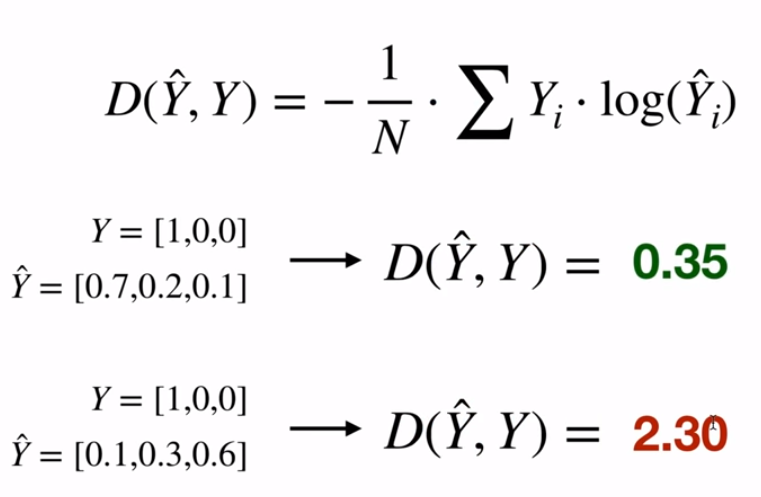

In [9]:
def cross_entropy_loss(actual, predicted):
  return -np.sum(actual * np.log(predicted)) / float(predicted.shape[0]) # normalized

In [11]:
# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy_loss(Y, Y_pred_good)
l2 = cross_entropy_loss(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.1189
Loss2 numpy: 0.7675


In [16]:
# nn.CrossEntropyLoss applies softmax and negative log likelihood loss
loss = nn.CrossEntropyLoss()

Y = torch.tensor([0])
# num of samples * num of classes
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1], [2.0, 1.0, 0.1], [2.0, 1.0, 0.1]])
Y_pred_bad =  torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Loss1 torch: {l1.item():.4f}')
print(f'Loss2 torch: {l2.item():.4f}')

Loss1 torch: 0.4170
Loss2 torch: 1.8406


In [18]:
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')

Actual class: 0, Y_pred1: 0, Y_pred2: 1


In [20]:
Y = torch.tensor([2, 0, 1])

# input is of size nBatch x nClasses = 3 x 3
# Y_pred are logits (not softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')

Batch Loss1:  0.2834
Batch Loss2: 1.6418
Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


In [21]:
class NeuralNet2(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    return out

In [23]:
model = NeuralNet2(input_size=28**2, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() # applies soft max

In [24]:
class NeuralNet1(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet1, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)
  
  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    y_pred = torch.sigmoid(out)
    return y_pred

In [26]:
model = NeuralNet1(input_size= 28**2, hidden_size=5)
criterion = nn.BCELoss()